### Q1

In [2]:
import pandas as pd

# Load the datasets
data_offers_path = './datasets/data_offers.csv'
data_orders_path = './datasets/data_orders.csv'

data_offers = pd.read_csv(data_offers_path)
data_orders = pd.read_csv(data_orders_path)

# Display the first few rows of each dataset to understand their structure
data_offers.head(), data_orders.head()


(        order_gk      offer_id
 0  3000579625629  300050936206
 1  3000627306450  300052064651
 2  3000632920686  300052408812
 3  3000632771725  300052393030
 4  3000583467642  300051001196,
   order_datetime  origin_longitude  origin_latitude  m_order_eta  \
 0       18:08:07         -0.978916        51.456173         60.0   
 1       20:57:32         -0.950385        51.456843          NaN   
 2       12:07:50         -0.969520        51.455544        477.0   
 3       13:50:20         -1.054671        51.460544        658.0   
 4       21:24:45         -0.967605        51.458236          NaN   
 
         order_gk  order_status_key  is_driver_assigned_key  \
 0  3000583041974                 4                       1   
 1  3000583116437                 4                       0   
 2  3000582891479                 4                       1   
 3  3000582941169                 4                       1   
 4  3000583140877                 9                       0   
 
    cancell

C:\Users\32048\AppData\Local\Temp\ipykernel_12740\3497755089.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=failed_orders, x='cancellation_reason', order=failed_orders['cancellation_reason'].value_counts().index, palette='Blues')


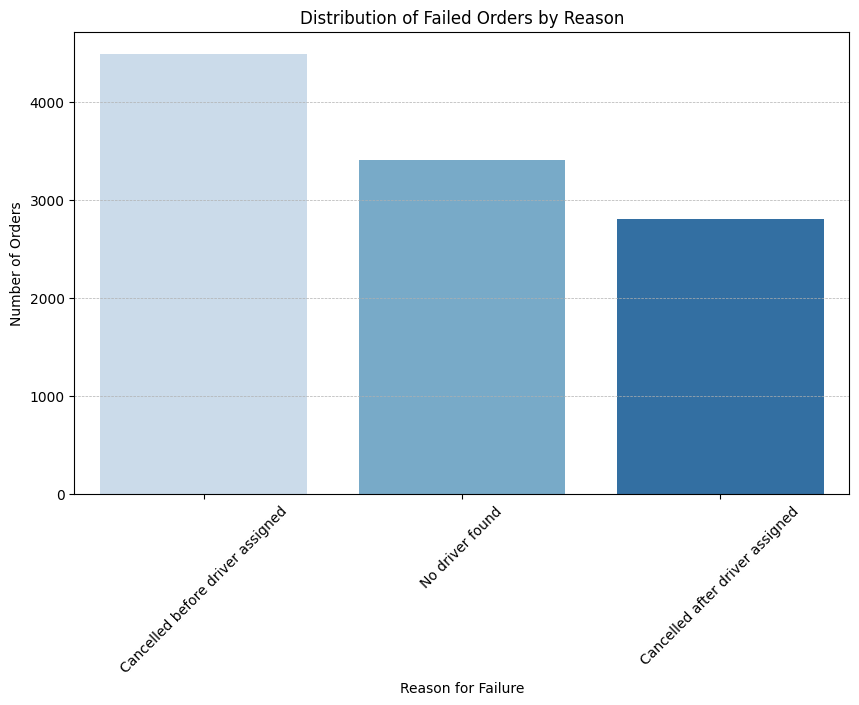

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 定义失败原因
# 假设 order_status_key 代码：4 = 已取消；9 = 未找到司机，其他代码可能表示成功完成或其他状态
# is_driver_assigned_key: 1 = 已分配司机，0 = 未分配司机

# 过滤认为是失败的订单
failed_orders = data_orders[data_orders['order_status_key'].isin([4, 9])]

# 创建一个新的列来记录取消原因
failed_orders['cancellation_reason'] = failed_orders.apply(
    lambda x: 'Cancelled after driver assigned' if x['order_status_key'] == 4 and x['is_driver_assigned_key'] == 1
    else ('Cancelled before driver assigned' if x['order_status_key'] == 4 and x['is_driver_assigned_key'] == 0
          else 'No driver found'),
    axis=1
)

# 使用 Seaborn 绘制失败订单的分布
plt.figure(figsize=(10, 6))
sns.countplot(data=failed_orders, x='cancellation_reason', order=failed_orders['cancellation_reason'].value_counts().index, palette='Blues')
plt.title('Distribution of Failed Orders by Reason')
plt.xlabel('Reason for Failure')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()


### Q2

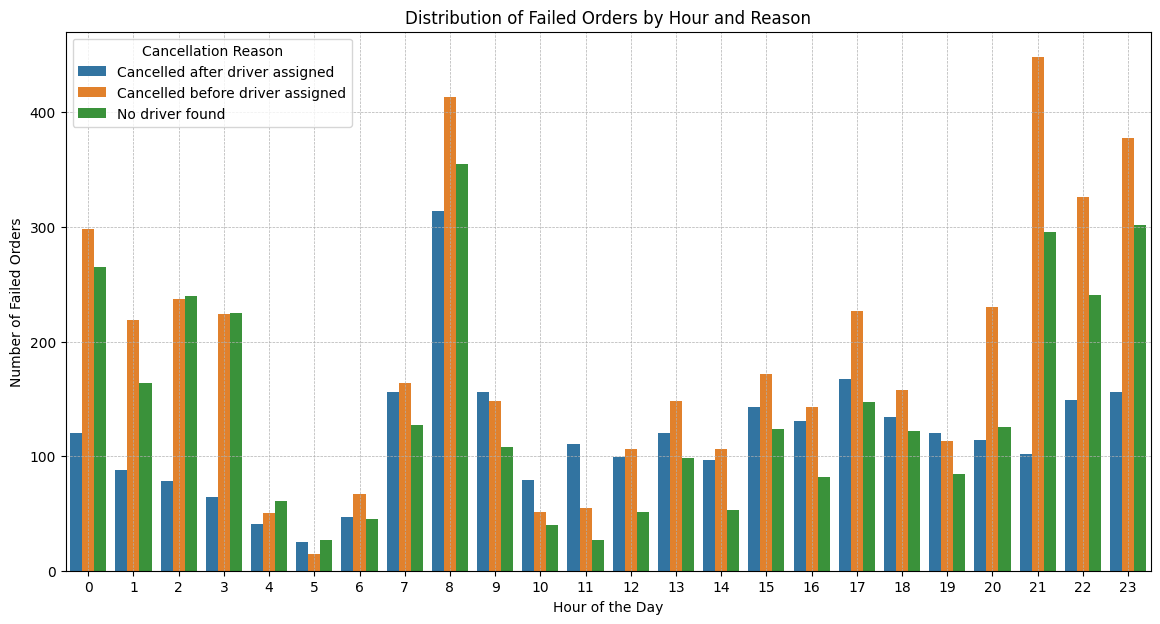

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 转换 order_datetime 列为 datetime 类型，并提取小时信息
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'], format='%H:%M:%S')
data_orders['order_hour'] = data_orders['order_datetime'].dt.hour

# 过滤出失败的订单
failed_orders = data_orders[data_orders['order_status_key'].isin([4, 9])]

# 创建失败原因分类
failed_orders['cancellation_reason'] = failed_orders.apply(
    lambda x: 'Cancelled after driver assigned' if x['order_status_key'] == 4 and x['is_driver_assigned_key'] == 1
    else ('Cancelled before driver assigned' if x['order_status_key'] == 4 and x['is_driver_assigned_key'] == 0
          else 'No driver found'),
    axis=1
)

# 计算每小时不同失败原因的订单数量
hourly_failures = failed_orders.pivot_table(index='order_hour', columns='cancellation_reason', aggfunc='size', fill_value=0)
hourly_failures.reset_index(inplace=True)
hourly_failures_melted = hourly_failures.melt(id_vars='order_hour', var_name='Cancellation Reason', value_name='Count')

# 使用 Seaborn 绘制堆叠条形图
plt.figure(figsize=(14, 7))
sns.barplot(data=hourly_failures_melted, x='order_hour', y='Count', hue='Cancellation Reason')
plt.title('Distribution of Failed Orders by Hour and Reason')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Failed Orders')
plt.legend(title='Cancellation Reason')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Q3

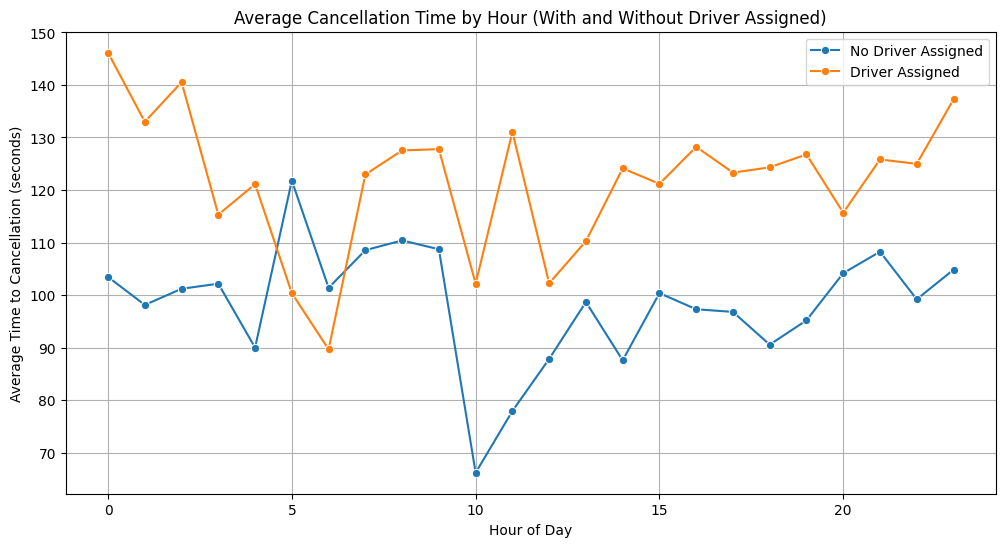

is_driver_assigned_key,order_hour,0,1
0,0,103.453925,146.131868
1,1,98.132420,132.985915
2,2,101.205128,140.527273
3,3,102.174888,115.326087
4,4,90.000000,121.125000
5,5,121.800000,100.368421
6,6,101.384615,89.675676
7,7,108.549383,122.962406
8,8,110.412346,127.540925
9,9,108.724138,127.781955


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'order_datetime' is in datetime format
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'], format='%H:%M:%S')
data_orders['order_hour'] = data_orders['order_datetime'].dt.hour

# Filter orders that were cancelled (assuming 'order_status_key' of 4 indicates cancelled)
cancelled_orders = data_orders[data_orders['order_status_key'] == 4]

# Remove outliers in cancellation times using the IQR method
Q1 = cancelled_orders['cancellations_time_in_seconds'].quantile(0.25)
Q3 = cancelled_orders['cancellations_time_in_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_cancelled_orders = cancelled_orders[
    (cancelled_orders['cancellations_time_in_seconds'] >= lower_bound) &
    (cancelled_orders['cancellations_time_in_seconds'] <= upper_bound)
]

# Calculate average cancellation time by hour and driver assignment status
average_cancellation_time = filtered_cancelled_orders.pivot_table(
    index='order_hour',
    columns='is_driver_assigned_key',
    values='cancellations_time_in_seconds',
    aggfunc='mean'
).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_cancellation_time, x='order_hour', y=0, marker='o', label='No Driver Assigned')
sns.lineplot(data=average_cancellation_time, x='order_hour', y=1, marker='o', label='Driver Assigned')
plt.title('Average Cancellation Time by Hour (With and Without Driver Assigned)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Time to Cancellation (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Provide a summary of results for analysis
average_cancellation_time

### Q4

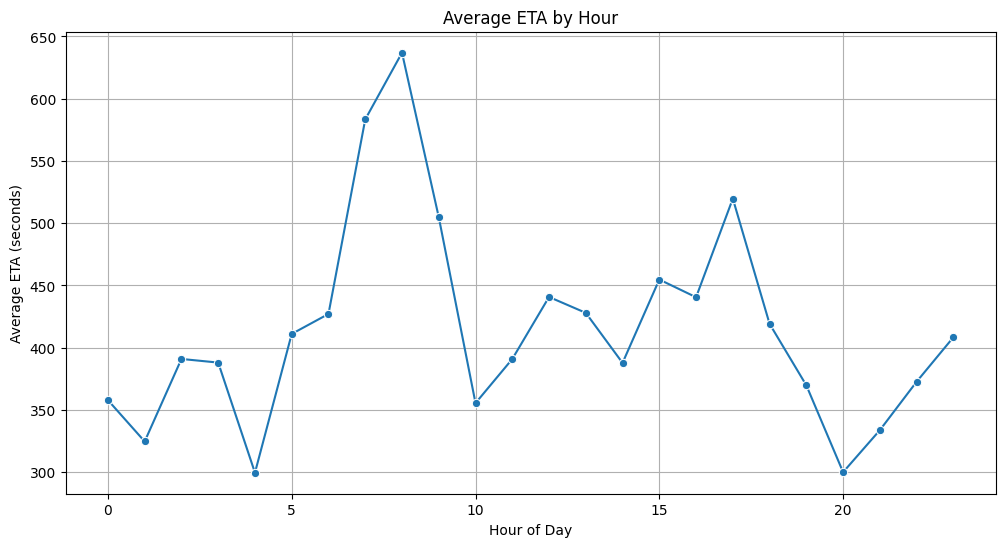

In [6]:
# 确保'order_datetime'列为时间格式
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'], format='%H:%M:%S')
data_orders['order_hour'] = data_orders['order_datetime'].dt.hour

# 筛选出有有效ETA的订单
valid_eta_orders = data_orders[data_orders['m_order_eta'].notna()]

# 计算每个小时的平均ETA
average_eta_by_hour = valid_eta_orders.groupby('order_hour')['m_order_eta'].mean().reset_index()

# 绘制平均ETA的分布图
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_eta_by_hour, x='order_hour', y='m_order_eta', marker='o')
plt.title('Average ETA by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average ETA (seconds)')
plt.grid(True)
plt.show()


### Q5

In [14]:
import folium
import h3
from matplotlib.colors import rgb2hex, Normalize

In [19]:
import pandas as pd
import h3
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.pyplot as plt

data_orders = pd.read_csv('./datasets/data_orders.csv')

# 使用分辨率7
data_orders['hex_id'] = data_orders.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8), axis=1)

hex_order_counts = data_orders['hex_id'].value_counts().reset_index()
hex_order_counts.columns = ['hex_id', 'count']

order_total = hex_order_counts['count'].sum()
cutoff = order_total * 0.8

hex_order_counts = hex_order_counts.sort_values(by='count', ascending=False)
cumulative_sum = hex_order_counts['count'].cumsum()
required_hexagons = hex_order_counts[cumulative_sum <= cutoff]

# 调整地图中心位置和缩放级别
map_center = [data_orders['origin_latitude'].median(), data_orders['origin_longitude'].median()]
maps = folium.Map(location=map_center, zoom_start=8)

max_count = required_hexagons['count'].max()
min_count = required_hexagons['count'].min()

def color_scale(count):
    norm = Normalize(min_count, max_count)
    rgba = plt.cm.Blues(norm(count))  # 使用蓝色系列颜色映射
    return rgb2hex(rgba)

for idx, row in required_hexagons.iterrows():
    hex_boundary = h3.h3_to_geo_boundary(row['hex_id'], geo_json=True)
    folium.Polygon(
        locations=[list(reversed(coord)) for coord in hex_boundary],
        fill=True,
        weight=2,
        color='black',  # 边框颜色
        fill_color=color_scale(row['count']),
        fill_opacity=0.5
    ).add_to(maps)

maps.save('hex_map.html')
